# Hypothesis Testing Exercise

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Minitab File : Cutlets.mtw


In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv(r'Cutlets.csv')

# Data Exploration

In [3]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
df.tail()

,Unit A,Unit B
30,6.7794,7.0992
31,7.2783,7.1180
32,7.1561,6.6965
33,7.3943,6.5780
34,6.9405,7.3875


In [5]:
df.sample(5)

,Unit A,Unit B
6,6.8755,7.2212
17,7.2705,7.4314
19,7.3495,6.7478
22,6.5341,6.5217
5,7.3871,6.8110


In [6]:
df.info

<bound method DataFrame.info of     Unit A  Unit B
0   6.8090  6.7703
1   6.4376  7.5093
2   6.9157  6.7300
3   7.3012  6.7878
4   7.4488  7.1522
5   7.3871  6.8110
6   6.8755  7.2212
7   7.0621  6.6606
8   6.6840  7.2402
9   6.8236  7.0503
10  7.3930  6.8810
11  7.5169  7.4059
12  6.9246  6.7652
13  6.9256  6.0380
14  6.5797  7.1581
15  6.8394  7.0240
16  6.5970  6.6672
17  7.2705  7.4314
18  7.2828  7.3070
19  7.3495  6.7478
20  6.9438  6.8889
21  7.1560  7.4220
22  6.5341  6.5217
23  7.2854  7.1688
24  6.9952  6.7594
25  6.8568  6.9399
26  7.2163  7.0133
27  6.6801  6.9182
28  6.9431  6.3346
29  7.0852  7.5459
30  6.7794  7.0992
31  7.2783  7.1180
32  7.1561  6.6965
33  7.3943  6.5780
34  6.9405  7.3875>

In [7]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


# Data Preprocessing

### Idetifying Duplicates

In [8]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Unit A, Unit B]
Index: []


In [9]:
# We don't have any duplicated values present in our dataset.

### Identifying Missing Values

In [10]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [11]:
# We don't have any null values present in our dataset.

### Identifying Outliers

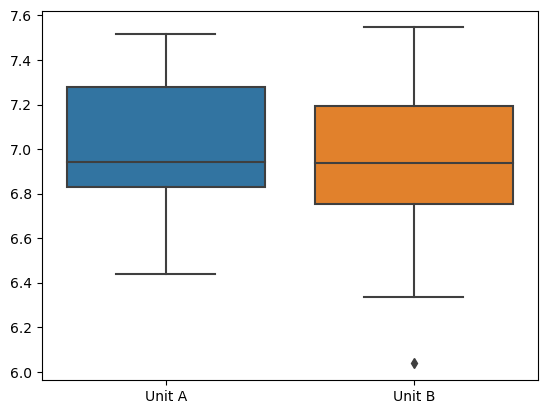

In [12]:
sns.boxplot(data=df);

Median is 6.9438, lower limit is 6.1579250000000005 and upper limit is 7.9541249999999994


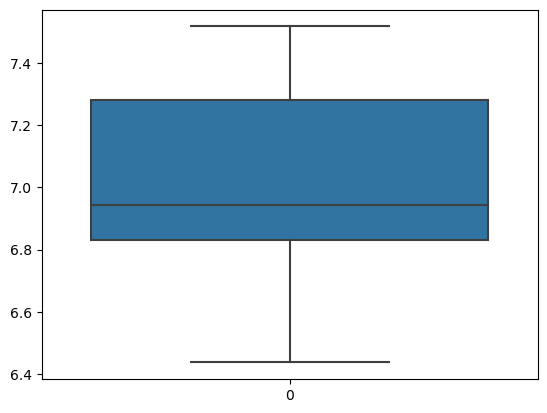

In [13]:
ser = pd.Series(df['Unit A'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [14]:
# In the boxplot of diameter of cutlets of Unit A, the median score is approx 6.94.
# with an interquartile range (IQR) spanning from 6.15 to 7.95. 
# There is no outliers present. The distribution is slightly positively skewed.

Median is 6.9399, lower limit is 6.091500000000001 and upper limit is 7.8571


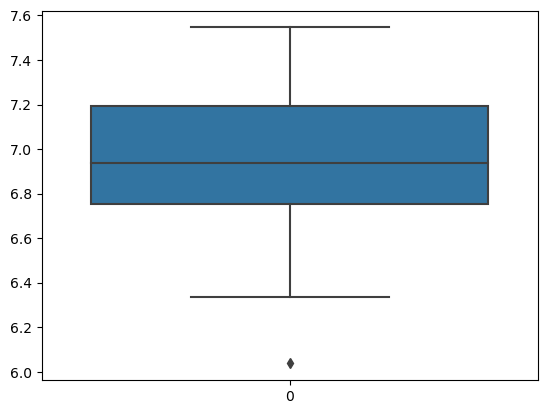

In [15]:
ser = pd.Series(df['Unit B'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [16]:
# In the boxplot of diameter of cutlets of Unit B, the median score is 6.93.
# with an interquartile range (IQR) spanning from 6.09 to 7.85. 
# There is one outliers present at lower end.

C:\Users\vijay\AppData\Local\Temp\ipykernel_16032\705463734.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


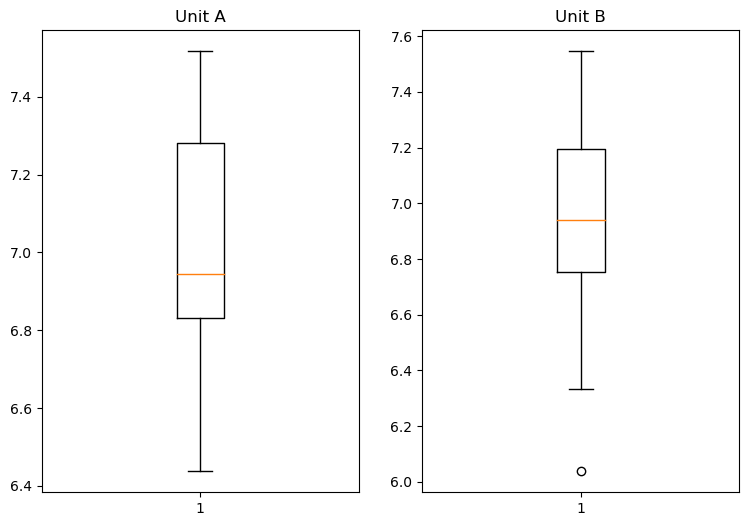

In [17]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B');

C:\Users\vijay\AppData\Local\Temp\ipykernel_16032\2963797498.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


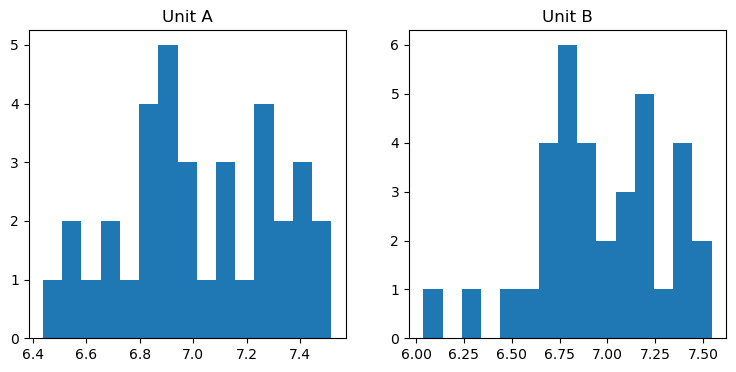

In [18]:
plt.subplots(figsize = (9,4))
plt.subplot(121)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit B'], bins = 15)
plt.title('Unit B');

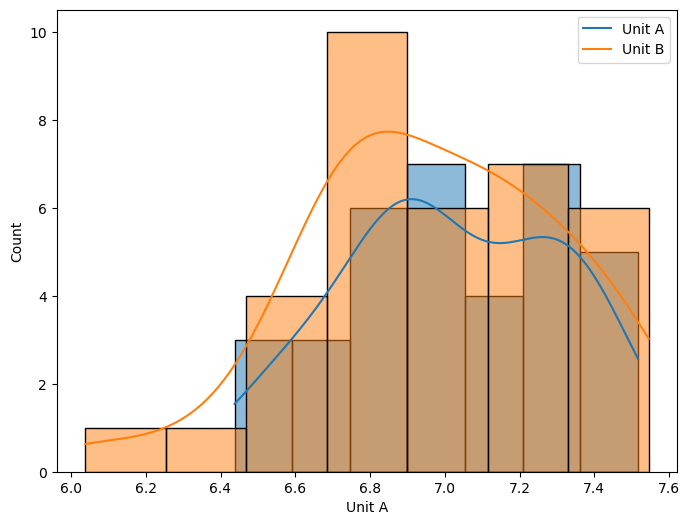

In [19]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.histplot(df['Unit A'], kde = True)
sns.histplot(df['Unit B'], kde = True)
plt.legend(labels);

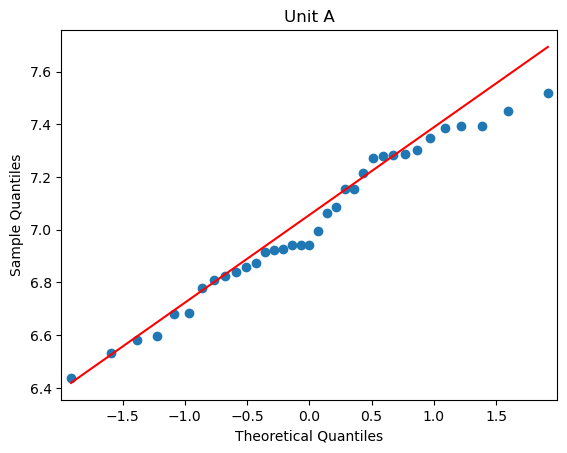

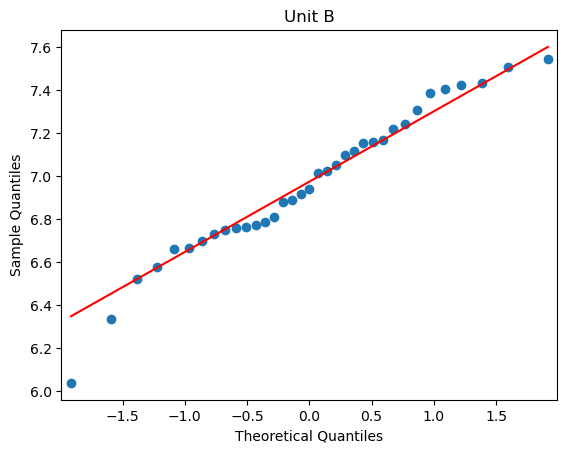

In [20]:
sm.qqplot(df["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(df["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

In [21]:
# In the Q-Q plot, most data points adhere closely to the 45-degree reference line, 
# indicating that the observed quantiles are in good agreement with the expected quantiles of a normal distribution.

# Hypothesis Testing Using T-stats

In [22]:
statistic, p_value =  stats.ttest_ind(df['Unit A'], df['Unit B'])

print(f"p-value for t-test: {p_value}")
print(f"Test Statistics : {statistic}")

p-value for t-test: 0.4722394724599501
Test Statistics : 0.7228688704678063


# Compare P value with Alpha

In [23]:
alpha = 0.05

if p_value < alpha:
    print('We are rejecting Null Hypothesis')
else:
    print('We are accepting Null Hypothesis')

We are accepting Null Hypothesis


In [24]:
# Hence we fail to reject Null Hypothesis